Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load the Dataset

In [2]:
df = pd.read_csv("9249290-cost-revenue-clean.csv")


Check the Data Structure

In [3]:
print(df.head())       # Show first 5 rows
print(df.info())       # Get data types and missing values
print(df.describe())   # Summary statistics


   production_budget_usd  worldwide_gross_usd
0                1000000                   26
1                  10000                  401
2                 400000                  423
3                 750000                  450
4                  10000                  527
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   production_budget_usd  5034 non-null   int64
 1   worldwide_gross_usd    5034 non-null   int64
dtypes: int64(2)
memory usage: 78.8 KB
None
       production_budget_usd  worldwide_gross_usd
count           5.034000e+03         5.034000e+03
mean            3.290784e+07         9.515685e+07
std             4.112589e+07         1.726012e+08
min             1.100000e+03         2.600000e+01
25%             6.000000e+06         7.000000e+06
50%             1.900000e+07         3.296202e+07
75%             4.200000

Handle Missing or Incorrect Data (if needed)

In [7]:
df = df.dropna()  # Remove rows with missing values (if any)


Visualize the Data

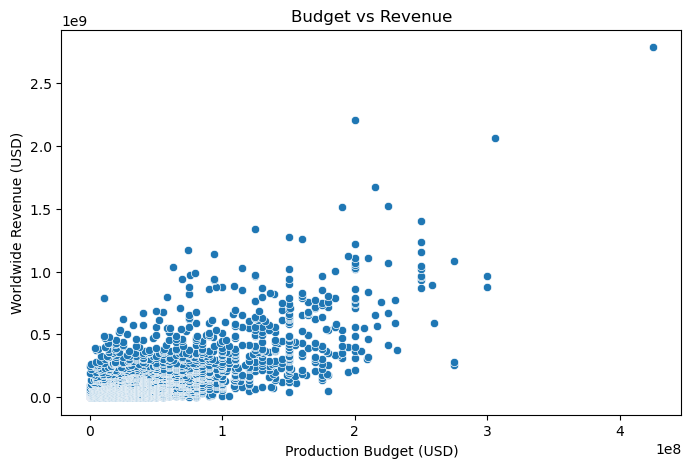

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['production_budget_usd'], y=df['worldwide_gross_usd'])
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Revenue (USD)')
plt.title('Budget vs Revenue')
plt.show()


Prepare Data for Training

In [10]:
X = df[['production_budget_usd']]  # Feature (input)
y = df['worldwide_gross_usd']   # Target (output)


# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Linear Regression Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [12]:
y_pred = model.predict(X_test)


In [ ]:
Evaluate the Model

In [13]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 62165121.199581504
Mean Squared Error (MSE): 1.2226882123832418e+16
Root Mean Squared Error (RMSE): 110575232.86809039
R-squared (R2): 0.5564505810738753


Visualize Predictions vs Actual Values

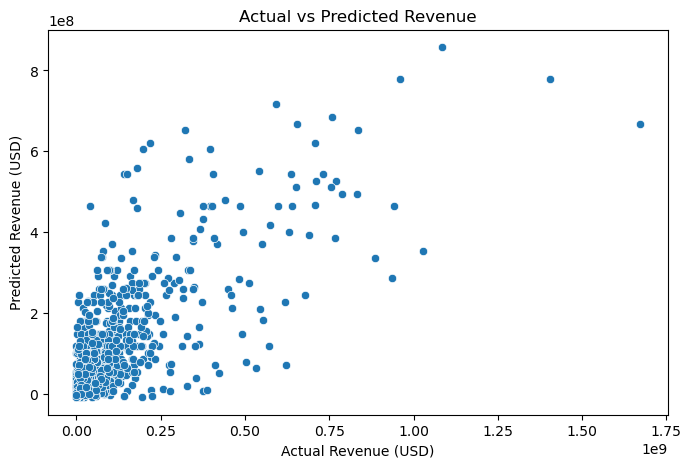

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Revenue (USD)')
plt.ylabel('Predicted Revenue (USD)')
plt.title('Actual vs Predicted Revenue')
plt.show()
